In [2]:
import gffutils
import pybedtools
import os
from pybedtools import BedTool
import importlib
import pandas as pd
from gtfparse import read_gtf

# version 3 peak&gene TSS 的关系

## all gene

In [3]:
# GTF

gtf_file = "/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/genomes/dmel-all-r6.41.gtf"

gtf_data = pd.read_csv(gtf_file, sep='\t', comment='#', header=None, names=[
    'seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute'
])

attributes = gtf_data['attribute'].str.extract(
    r'gene_id "(?P<gene_id>[^"]+)"; gene_symbol "(?P<gene_symbol>[^"]+)"; transcript_id "(?P<transcript_id>[^"]+)"; transcript_symbol "(?P<transcript_symbol>[^"]+)"'
)

gtf_data = pd.concat([gtf_data, attributes], axis=1).drop(columns=['attribute'])

gtf_data


,seqname,source,feature,start,end,score,strand,frame,gene_id,gene_symbol,transcript_id,transcript_symbol
0,X,FlyBase,gene,19961297,19969323,.,+,.,NaN,NaN,NaN,NaN
1,X,FlyBase,mRNA,19961689,19968479,.,+,.,FBgn0031081,Nep3,FBtr0070000,Nep3-RA
2,X,FlyBase,5UTR,19961689,19961845,.,+,.,FBgn0031081,Nep3,FBtr0070000,Nep3-RA
3,X,FlyBase,exon,19961689,19961845,.,+,.,FBgn0031081,Nep3,FBtr0070000,Nep3-RA
4,X,FlyBase,exon,19963955,19964071,.,+,.,FBgn0031081,Nep3,FBtr0070000,Nep3-RA
...,...,...,...,...,...,...,...,...,...,...,...,...
547131,2L,FlyBase,CDS,862563,864134,.,-,0,FBgn0029095,aru,FBtr0078032,aru-RC
547132,2L,FlyBase,CDS,862319,862498,.,-,0,FBgn0029095,aru,FBtr0078032,aru-RC
547133,2L,FlyBase,CDS,862169,862258,.,-,0,FBgn0029095,aru,FBtr0078032,aru-RC
547134,2L,FlyBase,stop_codon,862166,862168,.,-,0,FBgn0029095,aru,FBtr0078032,aru-RC


In [4]:
#填充
gtf_data[['gene_id', 'gene_symbol', 'transcript_id', 'transcript_symbol']] = gtf_data[['gene_id', 'gene_symbol', 'transcript_id', 'transcript_symbol']].bfill()
gtf_data

,seqname,source,feature,start,end,score,strand,frame,gene_id,gene_symbol,transcript_id,transcript_symbol
0,X,FlyBase,gene,19961297,19969323,.,+,.,FBgn0031081,Nep3,FBtr0070000,Nep3-RA
1,X,FlyBase,mRNA,19961689,19968479,.,+,.,FBgn0031081,Nep3,FBtr0070000,Nep3-RA
2,X,FlyBase,5UTR,19961689,19961845,.,+,.,FBgn0031081,Nep3,FBtr0070000,Nep3-RA
3,X,FlyBase,exon,19961689,19961845,.,+,.,FBgn0031081,Nep3,FBtr0070000,Nep3-RA
4,X,FlyBase,exon,19963955,19964071,.,+,.,FBgn0031081,Nep3,FBtr0070000,Nep3-RA
...,...,...,...,...,...,...,...,...,...,...,...,...
547131,2L,FlyBase,CDS,862563,864134,.,-,0,FBgn0029095,aru,FBtr0078032,aru-RC
547132,2L,FlyBase,CDS,862319,862498,.,-,0,FBgn0029095,aru,FBtr0078032,aru-RC
547133,2L,FlyBase,CDS,862169,862258,.,-,0,FBgn0029095,aru,FBtr0078032,aru-RC
547134,2L,FlyBase,stop_codon,862166,862168,.,-,0,FBgn0029095,aru,FBtr0078032,aru-RC


In [5]:
# 过滤基因
genes_df = gtf_data[gtf_data['feature'] == 'gene'][['seqname', 'start', 'end', 'strand', 'gene_id', 'gene_symbol']]
genes_df.columns = ['Chromosome', 'Start', 'End', 'Strand', 'Gene_ID', 'Gene_Symbol']
genes_df

,Chromosome,Start,End,Strand,Gene_ID,Gene_Symbol
0,X,19961297,19969323,+,FBgn0031081,Nep3
67,X,20025099,20025170,+,FBgn0052826,tRNA:Pro-CGG-1-1
70,X,20051294,20052519,+,FBgn0031085,CG9570
78,X,20094398,20095767,+,FBgn0062565,Or19b
88,X,20133579,20138878,+,FBgn0031088,CG15322
...,...,...,...,...,...,...
546972,2L,914086,917805,+,FBgn0046113,GluRIIC
547000,2L,901491,901654,-,FBgn0003916,snRNA:U1:21D
547003,2L,877172,885141,-,FBgn0031292,CG15824
547074,2L,868673,869857,-,FBgn0020305,dbe


In [6]:
# 读取peaks文件
files = [
    '/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model/test_coors_2L',
    '/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model/test_coors_2R',
    '/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model/test_coors_3L',
    '/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model/test_coors_3R',
    '/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model/test_coors_4',
    '/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model/test_coors_X'
]

dfs = [pd.read_csv(file, header=0) for file in files]
peaks_df = pd.concat(dfs, ignore_index=True)

peaks_df


,Unnamed: 0,Chromosome,Start,End,label_head,label_testis
0,2619,2L,21589454.0,21590454.0,1.0,0.0
1,12932,2L,17986000.0,17987000.0,0.0,0.0
2,9045,2L,12762000.0,12763000.0,0.0,0.0
3,16351,2L,19799559.0,19800559.0,0.0,1.0
4,9217,2L,12973000.0,12974000.0,0.0,0.0
...,...,...,...,...,...,...
123158,9372,X,13018000.0,13019000.0,0.0,0.0
123159,7291,X,10124000.0,10125000.0,0.0,0.0
123160,12943,X,4366101.0,4367101.0,1.0,1.0
123161,7293,X,10126000.0,10127000.0,0.0,0.0


In [7]:
peaks_df = peaks_df[['Chromosome', 'Start', 'End', 'label_head', 'label_testis']].dropna()
peaks_df['Start'] = peaks_df['Start'].astype(int)
peaks_df['End'] = peaks_df['End'].astype(int)
peaks_df = peaks_df.sort_values(['Chromosome', 'Start', 'End'])
peaks_df = peaks_df[(peaks_df['label_head'] != 0) | (peaks_df['label_testis'] != 0)]

peaks_df

,Chromosome,Start,End,label_head,label_testis
101157,4,42921,43921,1.0,1.0
100428,4,46917,47917,1.0,0.0
100610,4,55994,56994,1.0,1.0
100788,4,58626,59626,1.0,1.0
100757,4,59938,60938,1.0,1.0
...,...,...,...,...,...
115315,X,23531587,23532587,1.0,0.0
111308,X,23535060,23536060,1.0,1.0
111853,X,23535835,23536835,1.0,1.0
108820,X,23536912,23537912,1.0,1.0


In [8]:
genes_df['Chromosome'] = genes_df['Chromosome'].astype(str)
peaks_df['Chromosome'] = peaks_df['Chromosome'].astype(str)

genes_bed = pybedtools.BedTool.from_dataframe(genes_df)
peaks_bed = pybedtools.BedTool.from_dataframe(peaks_df)

# 不知道为什么非要排序才行
genes_bed_sorted = genes_bed.sort()
peaks_bed_sorted = peaks_bed.sort()

# closest是pybedtools的方法，D=b & D=a
# 正值: gene start - peak end
# 负值: gene end - peak start
closest_genes = peaks_bed_sorted.closest(genes_bed_sorted, D='b')
closest_genes

<BedTool(/tmp/pybedtools.4yic_f7k.tmp)>

In [9]:
closest_genes_df = closest_genes.to_dataframe(names=[
    'Chromosome', 'Start', 'End', 'label_head', 'label_testis',
    'Nearest_Chromosome', 'Nearest_Start', 'Nearest_End', 'Strand',
    'Gene_ID', 'Gene_Symbol', 'Distance'])
closest_genes_df

,Chromosome,Start,End,label_head,label_testis,Nearest_Chromosome,Nearest_Start,Nearest_End,Strand,Gene_ID,Gene_Symbol,Distance
0,2L,2124,3124,1.0,1.0,2L,7529,9484,+,FBgn0031208,CR11023,4406
1,2L,5251,6251,1.0,1.0,2L,7529,9484,+,FBgn0031208,CR11023,1279
2,2L,16278,17278,1.0,0.0,2L,9839,21376,-,FBgn0002121,l(2)gl,0
3,2L,17912,18912,1.0,1.0,2L,9839,21376,-,FBgn0002121,l(2)gl,0
4,2L,19117,20117,1.0,0.0,2L,9839,21376,-,FBgn0002121,l(2)gl,0
...,...,...,...,...,...,...,...,...,...,...,...,...
31281,X,23531587,23532587,1.0,0.0,X,23538215,23538283,-,FBgn0286519,mir-10404-5,5629
31282,X,23535060,23536060,1.0,1.0,X,23538215,23538283,-,FBgn0286519,mir-10404-5,2156
31283,X,23535835,23536835,1.0,1.0,X,23538215,23538283,-,FBgn0286519,mir-10404-5,1381
31284,X,23536912,23537912,1.0,1.0,X,23538215,23538283,-,FBgn0286519,mir-10404-5,304


In [10]:
closest_genes_df = pd.DataFrame(closest_genes_df)


In [11]:
# switch Distance sign
closest_genes_df.loc[closest_genes_df['Strand'] == '-', 'Distance'] = -closest_genes_df['Distance']

closest_genes_df

,Chromosome,Start,End,label_head,label_testis,Nearest_Chromosome,Nearest_Start,Nearest_End,Strand,Gene_ID,Gene_Symbol,Distance
0,2L,2124,3124,1.0,1.0,2L,7529,9484,+,FBgn0031208,CR11023,4406
1,2L,5251,6251,1.0,1.0,2L,7529,9484,+,FBgn0031208,CR11023,1279
2,2L,16278,17278,1.0,0.0,2L,9839,21376,-,FBgn0002121,l(2)gl,0
3,2L,17912,18912,1.0,1.0,2L,9839,21376,-,FBgn0002121,l(2)gl,0
4,2L,19117,20117,1.0,0.0,2L,9839,21376,-,FBgn0002121,l(2)gl,0
...,...,...,...,...,...,...,...,...,...,...,...,...
31281,X,23531587,23532587,1.0,0.0,X,23538215,23538283,-,FBgn0286519,mir-10404-5,-5629
31282,X,23535060,23536060,1.0,1.0,X,23538215,23538283,-,FBgn0286519,mir-10404-5,-2156
31283,X,23535835,23536835,1.0,1.0,X,23538215,23538283,-,FBgn0286519,mir-10404-5,-1381
31284,X,23536912,23537912,1.0,1.0,X,23538215,23538283,-,FBgn0286519,mir-10404-5,-304


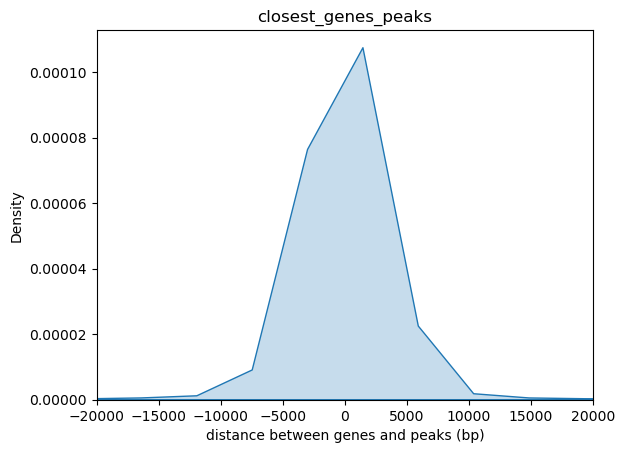

In [12]:
# density plot 
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

sns.kdeplot(closest_genes_df['Distance'], shade=True)
plt.title('Density Plot of Distance')
plt.xlabel('distance between genes and peaks (bp)')
plt.ylabel('Density')
plt.xlim(-20000, 20000)
plt.title('closest_genes_peaks')
#plt.savefig('closest_genes_peaks.pdf')
plt.show()

In [13]:
filtered_df = closest_genes_df[(closest_genes_df['Distance'] >= -1000) & (closest_genes_df['Distance'] <= 1000)]
filtered_df

,Chromosome,Start,End,label_head,label_testis,Nearest_Chromosome,Nearest_Start,Nearest_End,Strand,Gene_ID,Gene_Symbol,Distance
2,2L,16278,17278,1.0,0.0,2L,9839,21376,-,FBgn0002121,l(2)gl,0
3,2L,17912,18912,1.0,1.0,2L,9839,21376,-,FBgn0002121,l(2)gl,0
4,2L,19117,20117,1.0,0.0,2L,9839,21376,-,FBgn0002121,l(2)gl,0
5,2L,20749,21749,1.0,1.0,2L,9839,21376,-,FBgn0002121,l(2)gl,0
6,2L,34463,35463,0.0,1.0,2L,25402,65404,-,FBgn0051973,Cda5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
31213,X,23291062,23292062,1.0,0.0,X,23291450,23291518,+,FBgn0286518,mir-10404-4,0
31214,X,23291062,23292062,1.0,0.0,X,23291549,23291671,+,FBgn0267523,5.8SrRNA-Psi:CR45863,0
31215,X,23291062,23292062,1.0,0.0,X,23291700,23291729,+,FBgn0267524,2SrRNA:CR45864,0
31284,X,23536912,23537912,1.0,1.0,X,23538215,23538283,-,FBgn0286519,mir-10404-5,-304


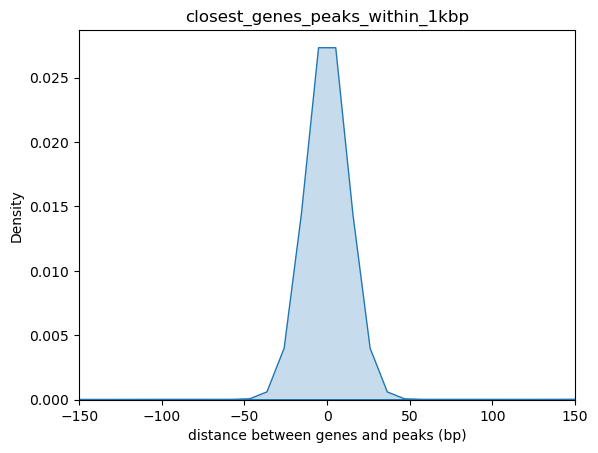

In [14]:
# density plot 
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

sns.kdeplot(filtered_df['Distance'], shade=True)
plt.title('Density Plot of Distance')
plt.xlabel('distance between genes and peaks (bp)')
plt.ylabel('Density')
plt.xlim(-150, 150)
plt.title('closest_genes_peaks_within_1kbp')
#plt.savefig('closest_genes_peaks_within_1kbp.p df')
plt.show()

# Here's de novo gene list 

In [15]:
# 这个是Junhui给我的坐标denovo

denovolist = pd.read_csv('/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/genomes/denovogenelist_w_location.csv', header=0)
denovolist.columns = ['Unnamed', 'Chromosome', 'Start', 'End', 'Gene']

denovolist['Start'] = denovolist['Start'].astype(int)
denovolist['End'] = denovolist['End'].astype(int)

denovolist_bed = pybedtools.BedTool.from_dataframe(denovolist[['Chromosome', 'Start', 'End', 'Gene']])

peaks_bed_sorted = peaks_bed.sort()
denovolist_bed_sorted = denovolist_bed.sort()


In [16]:
# 进行最近邻基因查找
closest_genes_denovo = peaks_bed_sorted.closest(denovolist_bed_sorted, D='b')
closest_genes_denovo


<BedTool(/tmp/pybedtools.xhz_ykd0.tmp)>

In [17]:
closest_denovo_genes_df = closest_genes_denovo.to_dataframe(names=[
    'Chromosome', 'Start', 'End', 'label_head', 'label_testis',
    'Nearest_Chromosome', 'Nearest_Start', 'Nearest_End', 'Gene_ID',
    'Distance'])

closest_denovo_genes_df #csv


,Chromosome,Start,End,label_head,label_testis,Nearest_Chromosome,Nearest_Start,Nearest_End,Gene_ID,Distance
0,2L,2124,3124,1.0,1.0,2L,325522,329761,FBgn0264086,322399
1,2L,5251,6251,1.0,1.0,2L,325522,329761,FBgn0264086,319272
2,2L,16278,17278,1.0,0.0,2L,325522,329761,FBgn0264086,308245
3,2L,17912,18912,1.0,1.0,2L,325522,329761,FBgn0264086,306611
4,2L,19117,20117,1.0,0.0,2L,325522,329761,FBgn0264086,305406
...,...,...,...,...,...,...,...,...,...,...
25371,X,23531587,23532587,1.0,0.0,X,21249976,21251148,FBgn0031168,-2280440
25372,X,23535060,23536060,1.0,1.0,X,21249976,21251148,FBgn0031168,-2283913
25373,X,23535835,23536835,1.0,1.0,X,21249976,21251148,FBgn0031168,-2284688
25374,X,23536912,23537912,1.0,1.0,X,21249976,21251148,FBgn0031168,-2285765


In [18]:
strandlist = pd.read_csv('/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/genomes/denovo_range_strand.tsv', sep='\t', header=0)

merged_closest_denovo_genes_df = pd.merge(closest_denovo_genes_df, strandlist[['Gene_ID', 'Strand']], on='Gene_ID', how='left')
merged_closest_denovo_genes_df['Strand'] = merged_closest_denovo_genes_df['Strand'].astype(str)
merged_closest_denovo_genes_df.loc[merged_closest_denovo_genes_df['Strand'] == '1.0', 'Strand'] = '+'
merged_closest_denovo_genes_df.loc[merged_closest_denovo_genes_df['Strand'] == '-1.0', 'Strand'] = '-'

merged_closest_denovo_genes_df
merged_closest_denovo_genes_df.to_csv('/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model/cloest_denovo_genes_peaks.csv', index=False)


In [19]:
merged_closest_denovo_genes_df.loc[merged_closest_denovo_genes_df['Strand'] == '-', 'Distance'] = -merged_closest_denovo_genes_df['Distance']
merged_closest_denovo_genes_df

,Chromosome,Start,End,label_head,label_testis,Nearest_Chromosome,Nearest_Start,Nearest_End,Gene_ID,Distance,Strand
0,2L,2124,3124,1.0,1.0,2L,325522,329761,FBgn0264086,-322399,-
1,2L,5251,6251,1.0,1.0,2L,325522,329761,FBgn0264086,-319272,-
2,2L,16278,17278,1.0,0.0,2L,325522,329761,FBgn0264086,-308245,-
3,2L,17912,18912,1.0,1.0,2L,325522,329761,FBgn0264086,-306611,-
4,2L,19117,20117,1.0,0.0,2L,325522,329761,FBgn0264086,-305406,-
...,...,...,...,...,...,...,...,...,...,...,...
25371,X,23531587,23532587,1.0,0.0,X,21249976,21251148,FBgn0031168,2280440,-
25372,X,23535060,23536060,1.0,1.0,X,21249976,21251148,FBgn0031168,2283913,-
25373,X,23535835,23536835,1.0,1.0,X,21249976,21251148,FBgn0031168,2284688,-
25374,X,23536912,23537912,1.0,1.0,X,21249976,21251148,FBgn0031168,2285765,-


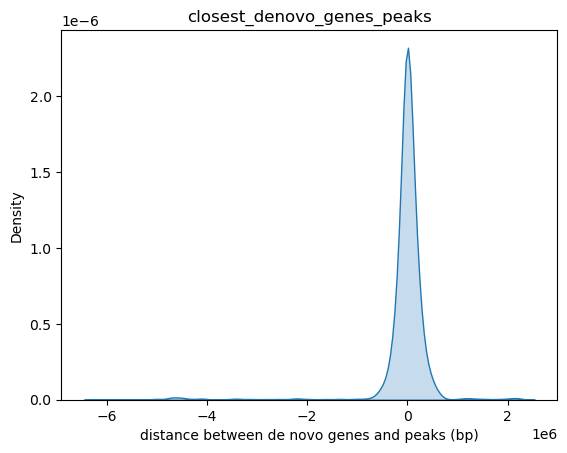

In [20]:
# density plot 
sns.kdeplot(merged_closest_denovo_genes_df['Distance'], shade=True)
plt.title('Density Plot of Distance')
plt.xlabel('distance between de novo genes and peaks (bp)')
plt.ylabel('Density')
plt.title('closest_denovo_genes_peaks')
plt.savefig('closest_denovo_genes_peaks.pdf')
plt.show()

In [21]:
filtered_denovo = merged_closest_denovo_genes_df[merged_closest_denovo_genes_df["Distance"] <= 1000]
filtered_denovo = filtered_denovo[filtered_denovo["Distance"] >= -1000]
closest_denovo_genes_df.to_csv('/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model/cloest_denovo_genes_peaks_within_1kbp.csv', index=False)
filtered_denovo #csv


,Chromosome,Start,End,label_head,label_testis,Nearest_Chromosome,Nearest_Start,Nearest_End,Gene_ID,Distance,Strand
80,2L,324852,325852,1.0,0.0,2L,325522,329761,FBgn0264086,0,-
81,2L,332221,333221,0.0,1.0,2L,329910,332335,FBgn0051921,0,-
274,2L,1198069,1199069,1.0,0.0,2L,1198465,1199266,FBgn0031323,0,-
509,2L,2391087,2392087,0.0,1.0,2L,2391660,2392105,FBgn0287218,0,+
708,2L,3356956,3357956,1.0,1.0,2L,3357646,3358618,FBgn0031526,0,+
...,...,...,...,...,...,...,...,...,...,...,...
24855,X,19888852,19889852,0.0,1.0,X,19886108,19890060,FBgn0086782,0,-
24856,X,19889679,19890679,0.0,1.0,X,19886108,19890060,FBgn0086782,0,-
24881,X,20096950,20097950,0.0,1.0,X,20096162,20096474,FBgn0260871,477,-
24904,X,20260119,20261119,0.0,1.0,X,20259239,20259656,FBgn0260867,-464,+


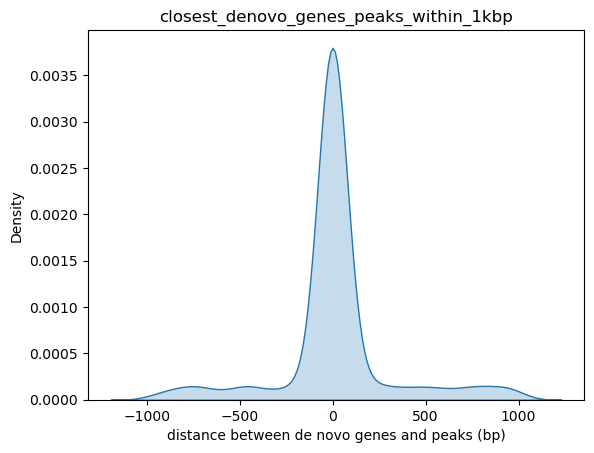

In [22]:
# density plot 
sns.kdeplot(filtered_denovo['Distance'], shade=True)
plt.title('Density Plot of Distance')
plt.xlabel('distance between de novo genes and peaks (bp)')
plt.ylabel('Density')
plt.title('closest_denovo_genes_peaks_within_1kbp')
#plt.savefig('closest_denovo_genes_peaks_within_1kbp.pdf')
plt.show()

In [23]:
# orth 555 denovo gene 

In [24]:
dsim_data = pd.read_csv('/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model/dmel_to_dsim_ortho_location.csv', header=0, sep='\t')
dsim_data = dsim_data.fillna({'chrom': 'unknown', 'start': 0, 'end': 0, 'name': 'unknown'})
dsim_data = dsim_data.rename(columns={
    'chrom': 'Chromosome',
    'start': 'Start',
    'end': 'End',
    'dmel_gene': 'dmel_gene',
    'name': 'dsim_ortho_name'
})
chromosome_replacements = {
    'NC_029795.1': 'X',
    'NT_479533.1': '2L',
    'NT_479534.1': '2R',
    'NT_479535.1': '3L',
    'NT_479536.1': '3R'}
dsim_data['Chromosome'] = dsim_data['Chromosome'].replace(chromosome_replacements)
dsim_data = dsim_data[dsim_data['Chromosome'] != 'unknown'] #要删掉这个，因为closest要对其chromosome，要不做不了，dsim有16个
dsim_data = dsim_data[['Chromosome', 'Start', 'End', 'dmel_gene', 'dsim_ortho_name', 'strand']]


# 确保列类型正确
dsim_data['Chromosome'] = dsim_data['Chromosome'].astype(str)
dsim_data['Start'] = dsim_data['Start'].astype(int)
dsim_data['End'] = dsim_data['End'].astype(int)

temp_bed_file = '/tmp/dsim_data.bed'
dsim_data.to_csv(temp_bed_file, sep='\t', header=False, index=False)
dsim_data


,Chromosome,Start,End,dmel_gene,dsim_ortho_name,strand
0,X,172961,173547,FBgn0262810,GD28905,+
1,X,610016,611702,FBgn0025616,GD16457,-
2,X,641542,642230,FBgn0040343,GD16454,-
4,X,656358,665290,FBgn0040892,GD28135,+
5,X,688426,689176,FBgn0029539,GD18737,+
...,...,...,...,...,...,...
503,3R,25563467,25563938,FBgn0261704,GD28075,-
504,3R,25764313,25765368,FBgn0266259,GD29086,-
505,3R,25773072,25774784,FBgn0039792,GD16925,-
506,3R,26073692,26074205,FBgn0039811,GD16730,-


In [25]:
# 读取peaks文件 dsim
files = [
    '/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model_dsim/test_coors_2L',
    '/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model_dsim/test_coors_2R',
    '/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model_dsim/test_coors_3L',
    '/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model_dsim/test_coors_3R',
    '/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model_dsim/test_coors_4',
    '/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model_dsim/test_coors_X'
]

dfs = [pd.read_csv(file, header=0) for file in files]
peaks_dsim = pd.concat(dfs, ignore_index=True)

peaks_dsim

,Unnamed: 0,Chromosome,Start,End,label_head,label_testis
0,2537,2L,13538785.0,13539785.0,1.0,0.0
1,8486,2L,12274000.0,12275000.0,0.0,0.0
2,8157,2L,11819000.0,11820000.0,0.0,0.0
3,2068,2L,10788376.0,10789376.0,1.0,1.0
4,1033,2L,1527000.0,1528000.0,0.0,0.0
...,...,...,...,...,...,...
109112,9372,X,13227000.0,13228000.0,0.0,0.0
109113,7291,X,10289000.0,10290000.0,0.0,0.0
109114,20198,X,14619429.0,14620429.0,1.0,0.0
109115,7293,X,10291000.0,10292000.0,0.0,0.0


In [26]:
peaks_dsim = peaks_dsim[['Chromosome', 'Start', 'End', 'label_head', 'label_testis']].dropna()
peaks_dsim['Start'] = peaks_dsim['Start'].astype(int)
peaks_dsim['End'] = peaks_dsim['End'].astype(int)
peaks_dsim = peaks_dsim.sort_values(['Chromosome', 'Start', 'End'])
peaks_dsim = peaks_dsim[(peaks_df['label_head'] != 0) | (peaks_dsim['label_testis'] != 0)]

peaks_dsim

<ipython-input-26-609fbf925224>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  peaks_dsim = peaks_dsim[(peaks_df['label_head'] != 0) | (peaks_dsim['label_testis'] != 0)]


,Chromosome,Start,End,label_head,label_testis
89319,4,12000,13000,0.0,0.0
89553,4,19000,20000,0.0,0.0
89518,4,27000,28000,0.0,0.0
89283,4,37000,38000,0.0,0.0
89366,4,38004,39004,1.0,1.0
...,...,...,...,...,...
94464,X,20774000,20775000,0.0,0.0
90397,X,20778000,20779000,0.0,0.0
94063,X,20779000,20780000,0.0,0.0
93092,X,20801000,20802000,0.0,0.0


In [156]:
temp_bed_file = '/tmp/dsim_data.bed'
dsim_data.to_csv(temp_bed_file, sep='\t', header=False, index=False)

with open(temp_bed_file, 'r') as f:
    for line in f.readlines()[:10]:  
        print(line.strip())

genes_bed = BedTool(temp_bed_file)
print(genes_bed.head())  

genes_bed_sorted = BedTool(temp_bed_file).sort()
print(genes_bed_sorted.head())

sorted_bed_file = genes_bed_sorted.fn
with open(sorted_bed_file, 'r') as f:
    print("Sorted file content:")
    for line in f.readlines()[:10]: 
        print(line.strip())

peaks_dsim['Chromosome'] = peaks_dsim['Chromosome'].astype(str)
peaks_dsim['Start'] = peaks_dsim['Start'].astype(int)
peaks_dsim['End'] = peaks_dsim['End'].astype(int)

peaks_bed = BedTool.from_dataframe(peaks_dsim)
peaks_bed_sorted = peaks_bed.sort()

X	172961	173547	FBgn0262810	GD28905	+
X	610016	611702	FBgn0025616	GD16457	-
X	641542	642230	FBgn0040343	GD16454	-
X	656358	665290	FBgn0040892	GD28135	+
X	688426	689176	FBgn0029539	GD18737	+
X	987255	988927	FBgn0029568	GD16548	+
X	990170	991101	FBgn0040357	GD16549	+
X	1080542	1081628	FBgn0052811	GD27532	-
X	1541659	1542542	FBgn0052806	GD24727	+
X	1572781	1573768	FBgn0029589	GD16412	-
X	172961	173547	FBgn0262810	GD28905	+
 X	610016	611702	FBgn0025616	GD16457	-
 X	641542	642230	FBgn0040343	GD16454	-
 X	656358	665290	FBgn0040892	GD28135	+
 X	688426	689176	FBgn0029539	GD18737	+
 X	987255	988927	FBgn0029568	GD16548	+
 X	990170	991101	FBgn0040357	GD16549	+
 X	1080542	1081628	FBgn0052811	GD27532	-
 X	1541659	1542542	FBgn0052806	GD24727	+
 X	1572781	1573768	FBgn0029589	GD16412	-
 None
2L	313828	316164	FBgn0264086	GD22964	-
 2L	316265	318645	FBgn0264086	GD22963	-
 2L	1145619	1146404	FBgn0031323	GD22918	-
 2L	1146562	1146871	FBgn0263080	GD27028	+
 2L	1366150	1366786	FBgn0263320	GD28431	+
 2L	1380

In [27]:
peaks_dsim['Chromosome'] = peaks_dsim['Chromosome'].astype(str)
peaks_dsim['Start'] = peaks_dsim['Start'].astype(int)
peaks_dsim['End'] = peaks_dsim['End'].astype(int)
print(dsim_data.head())
print(dsim_data.dtypes)

peaks_bed = BedTool.from_dataframe(peaks_dsim)
peaks_bed_sorted = peaks_bed.sort()

genes_bed_sorted = BedTool(temp_bed_file).sort()
print(peaks_bed_sorted.head())


  Chromosome   Start     End    dmel_gene dsim_ortho_name strand
0          X  172961  173547  FBgn0262810         GD28905      +
1          X  610016  611702  FBgn0025616         GD16457      -
2          X  641542  642230  FBgn0040343         GD16454      -
4          X  656358  665290  FBgn0040892         GD28135      +
5          X  688426  689176  FBgn0029539         GD18737      +
Chromosome         object
Start               int64
End                 int64
dmel_gene          object
dsim_ortho_name    object
strand             object
dtype: object
2L	5000	6000	0.0	0.0
 2L	14000	15000	0.0	0.0
 2L	18000	19000	0.0	0.0
 2L	26000	27000	0.0	0.0
 2L	33000	34000	0.0	0.0
 2L	49000	50000	0.0	0.0
 2L	50000	51000	0.0	0.0
 2L	56000	57000	0.0	0.0
 2L	63000	64000	0.0	0.0
 2L	66937	67937	0.0	1.0
 None


In [28]:
# 进行最近邻基因查找
closest_genes_denovo = peaks_bed_sorted.closest(genes_bed_sorted, D='b')

print(closest_genes_denovo)

2L	5000	6000	0.0	0.0	2L	313828	316164	FBgn0264086	GD22964	-	307829
2L	14000	15000	0.0	0.0	2L	313828	316164	FBgn0264086	GD22964	-	298829
2L	18000	19000	0.0	0.0	2L	313828	316164	FBgn0264086	GD22964	-	294829
2L	26000	27000	0.0	0.0	2L	313828	316164	FBgn0264086	GD22964	-	286829
2L	33000	34000	0.0	0.0	2L	313828	316164	FBgn0264086	GD22964	-	279829
2L	49000	50000	0.0	0.0	2L	313828	316164	FBgn0264086	GD22964	-	263829
2L	50000	51000	0.0	0.0	2L	313828	316164	FBgn0264086	GD22964	-	262829
2L	56000	57000	0.0	0.0	2L	313828	316164	FBgn0264086	GD22964	-	256829
2L	63000	64000	0.0	0.0	2L	313828	316164	FBgn0264086	GD22964	-	249829
2L	66937	67937	0.0	1.0	2L	313828	316164	FBgn0264086	GD22964	-	245892
2L	78000	79000	0.0	0.0	2L	313828	316164	FBgn0264086	GD22964	-	234829
2L	80628	81628	1.0	1.0	2L	313828	316164	FBgn0264086	GD22964	-	232201
2L	86000	87000	0.0	0.0	2L	313828	316164	FBgn0264086	GD22964	-	226829
2L	88202	89202	1.0	1.0	2L	313828	316164	FBgn0264086	GD22964	-	224627
2L	100830	101830	0.0	1.0	2L	313828	3

In [29]:
closest_denovo_genes_df = closest_genes_denovo.to_dataframe(names=[
    'Chromosome', 'Start', 'End', 'label_head', 'label_testis', 'Nearest_Chromosome', 
    'Nearest_Start', 'Nearest_End', 'dmel_denovo_gene', 'dsim_ortho_gene', 'Strand', 
    'Distance'])
closest_denovo_genes_df.loc[closest_denovo_genes_df['Strand'] == '-', 'Distance'] = -closest_denovo_genes_df['Distance']
closest_denovo_genes_df #csv

,Chromosome,Start,End,label_head,label_testis,Nearest_Chromosome,Nearest_Start,Nearest_End,dmel_denovo_gene,dsim_ortho_gene,Strand,Distance
0,2L,5000,6000,0.0,0.0,2L,313828,316164,FBgn0264086,GD22964,-,-307829
1,2L,14000,15000,0.0,0.0,2L,313828,316164,FBgn0264086,GD22964,-,-298829
2,2L,18000,19000,0.0,0.0,2L,313828,316164,FBgn0264086,GD22964,-,-294829
3,2L,26000,27000,0.0,0.0,2L,313828,316164,FBgn0264086,GD22964,-,-286829
4,2L,33000,34000,0.0,0.0,2L,313828,316164,FBgn0264086,GD22964,-,-279829
...,...,...,...,...,...,...,...,...,...,...,...,...
14506,X,20774000,20775000,0.0,0.0,X,19841388,19843013,FBgn0031168,GD27127,-,930988
14507,X,20778000,20779000,0.0,0.0,X,19841388,19843013,FBgn0031168,GD27127,-,934988
14508,X,20779000,20780000,0.0,0.0,X,19841388,19843013,FBgn0031168,GD27127,-,935988
14509,X,20801000,20802000,0.0,0.0,X,19841388,19843013,FBgn0031168,GD27127,-,957988


In [32]:
os.getcwd()

'/lustre/fs4/home/xwu05'

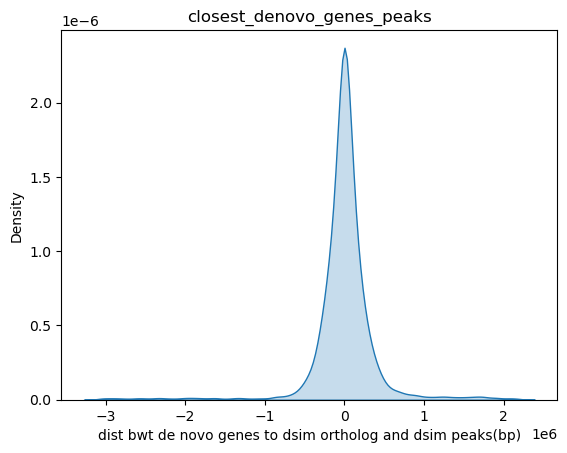

In [33]:
# density plot 
sns.kdeplot(closest_denovo_genes_df['Distance'], shade=True)
plt.title('Density Plot of Distance')
plt.xlabel('dist bwt de novo genes to dsim ortholog and dsim peaks(bp)')
plt.ylabel('Density')
plt.title('closest_denovo_genes_peaks')
plt.savefig('/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model/closest_dsim_denovo_genes_peaks.pdf')
plt.show()

In [166]:
# filtering
filtered_denovo = merged_closest_denovo_genes_df[merged_closest_denovo_genes_df["Distance"] <= 1000]
filtered_denovo = filtered_denovo[filtered_denovo["Distance"] >= -1000]
closest_denovo_genes_df.to_csv('/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model/cloest_ortholog_denovo_genes_peaks_dsim_within_1kbp.csv', index=False)
filtered_denovo #csv


,Chromosome,Start,End,label_head,label_testis,Nearest_Chromosome,Nearest_Start,Nearest_End,Gene_ID,Distance,Strand
80,2L,324852,325852,1.0,0.0,2L,325522,329761,FBgn0264086,0,-
81,2L,332221,333221,0.0,1.0,2L,329910,332335,FBgn0051921,0,-
274,2L,1198069,1199069,1.0,0.0,2L,1198465,1199266,FBgn0031323,0,-
509,2L,2391087,2392087,0.0,1.0,2L,2391660,2392105,FBgn0287218,0,+
708,2L,3356956,3357956,1.0,1.0,2L,3357646,3358618,FBgn0031526,0,+
...,...,...,...,...,...,...,...,...,...,...,...
24855,X,19888852,19889852,0.0,1.0,X,19886108,19890060,FBgn0086782,0,-
24856,X,19889679,19890679,0.0,1.0,X,19886108,19890060,FBgn0086782,0,-
24881,X,20096950,20097950,0.0,1.0,X,20096162,20096474,FBgn0260871,477,-
24904,X,20260119,20261119,0.0,1.0,X,20259239,20259656,FBgn0260867,-464,+


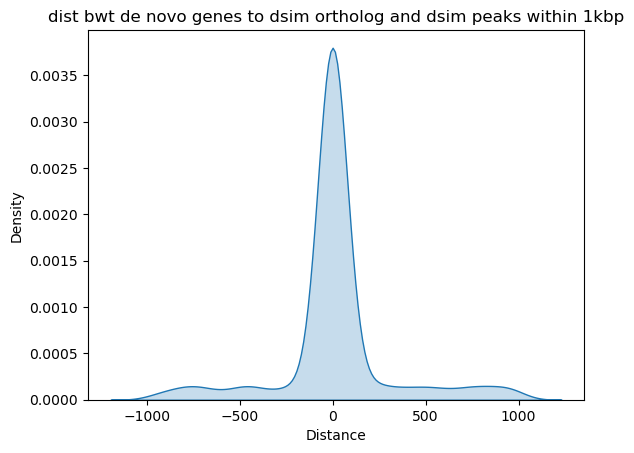

In [196]:
# density plot 
sns.kdeplot(filtered_denovo['Distance'], shade=True)
plt.title('Density Plot of Distance')
plt.title('dist bwt de novo genes to dsim ortholog and dsim peaks within 1kbp')
plt.ylabel('Density')
plt.savefig('closest_orth_denovo_genes_dsim_peaks_within_1kbp.pdf')
plt.show()

# dyak homologous de novo gene 

In [179]:
dyak_data = pd.read_csv('/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model/dmel_to_dyak_ortho_location.csv', header=0, sep='\t')
dyak_data = dyak_data.fillna({'chrom': 'unknown', 'start': 0, 'end': 0, 'name': 'unknown'})
dyak_data = dyak_data.rename(columns={
    'chrom': 'Chromosome',
    'start': 'Start',
    'end': 'End',
    'dmel_gene': 'dmel_gene',
    'name': 'dyak_ortho_name'
})
chromosome_replacements = {
    'NC_011091.1': 'X',
    'NT_167062.1': '2L',
    'NT_167063.1': '2R',
    'NT_167064.1': '3L',
    'NW_002053002.1': '3L',
    'NW_002053015.1': '3L',
    'NW_002053051.1': '3L',
    'NW_002052979.1': '3L',
    'NW_002052980.1': '3L',
    'NW_002053137.1': '3L',
    'NW_002053447.1': '3R',
    'NW_002053280.1': '3R',
    'NW_002053694.1': '3R',
    'NW_002053279.1': '3R',
    'NW_002053284.1': '3R',
    'NW_002053297.1': '3R',
    'NT_167065.1': '3R',
    'NW_002053145.1': '3L',
    'NW_002053175.1': '3L',
    'NW_002053181.1': '3L',
    'NW_002053184.1': '3L',
    'NW_002053186.1': '3L',
    'NW_002053189.1': '3L',
    'NW_002052946.1': '3L',
    'NW_002052940.1': '3L',
    'NW_002052939.1': '3L',
    'NW_002053211.1': '3L',
    'NW_002053226.1': '3L',
    'NW_002053276.1': '3R',
    'NW_002053298.1': '3R',
    'NW_002056840.1': 'Unknown',
    'NW_002056039.1': 'Unknown',
    'NW_002054789.1': 'Unknown',
    'NW_002057603.1': 'Unknown'
}
dyak_data['Chromosome'] = dyak_data['Chromosome'].replace(chromosome_replacements)
dyak_data = dyak_data[dyak_data['Chromosome'] != 'unknown'] #要删掉这个，因为closest要对其chromosome，要不做不了，dsim有16个
dyak_data = dyak_data[['Chromosome', 'Start', 'End', 'dmel_gene', 'dyak_ortho_name', 'strand']]


dyak_data['Chromosome'] = dyak_data['Chromosome'].astype(str)
dyak_data['Start'] = dyak_data['Start'].astype(int)
dyak_data['End'] = dyak_data['End'].astype(int)

temp_bed_file = '/tmp/dsim_data.bed'
dyak_data.to_csv(temp_bed_file, sep='\t', header=False, index=False)
dyak_data

print(dyak_data)


    Chromosome     Start       End    dmel_gene dyak_ortho_name strand
0            X    175271    175662  FBgn0262810         GE27764      +
1      Unknown       162      1503  FBgn0025616         GE29127      +
2            X    656258    656828  FBgn0040343         GE16563      -
4            X    673717    674335  FBgn0040892         GE16644      +
5            X    706277    707044  FBgn0029539         GE16646      +
6            X   1012554   1014031  FBgn0029568         GE16671      +
7            X   1015475   1016230  FBgn0040357         GE16672      +
8            X   1108171   1108716  FBgn0052811         GE28504      -
9            X   1528804   1529757  FBgn0052806         GE16708      +
10           X   1560090   1561063  FBgn0029589         GE16510      -
11           X   6365522   6366613  FBgn0029596         GE16983      +
12           X   6362150   6363462  FBgn0025627         GE16230      -
13           X   5590527   5591610  FBgn0040353         GE16915      +
14    

In [187]:
# dsim peaks
files = [
    '/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model_dyak/test_coors_2L',
    '/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model_dyak/test_coors_2R',
    '/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model_dyak/test_coors_3L',
    '/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model_dyak/test_coors_3R',
    '/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model_dyak/test_coors_4',
    '/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model_dyak/test_coors_X'
]

dfs = [pd.read_csv(file, header=0) for file in files]
peaks_dyak = pd.concat(dfs, ignore_index=True)

peaks_dyak

,Unnamed: 0,Chromosome,Start,End,label_head,label_testis
0,697,2L,4464564.0,4465564.0,1.0,0.0
1,3781,2L,5439000.0,5440000.0,0.0,0.0
2,12949,2L,18696000.0,18697000.0,0.0,0.0
3,6926,2L,9842000.0,9843000.0,0.0,0.0
4,115,2L,167000.0,168000.0,0.0,0.0
...,...,...,...,...,...,...
110088,9372,X,13093000.0,13094000.0,0.0,0.0
110089,7291,X,10236000.0,10237000.0,0.0,0.0
110090,15890,X,10839085.0,10840085.0,1.0,0.0
110091,7293,X,10238000.0,10239000.0,0.0,0.0


In [188]:
peaks_dyak = peaks_dyak[['Chromosome', 'Start', 'End', 'label_head', 'label_testis']].dropna()
peaks_dyak['Start'] = peaks_dyak['Start'].astype(int)
peaks_dyak['End'] = peaks_dyak['End'].astype(int)
peaks_dyak = peaks_dyak.sort_values(['Chromosome', 'Start', 'End'])
peaks_dyak = peaks_dyak[(peaks_df['label_head'] != 0) | (peaks_dyak['label_testis'] != 0)]


<ipython-input-188-1857b394fdb2>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  peaks_dyak = peaks_dyak[(peaks_df['label_head'] != 0) | (peaks_dyak['label_testis'] != 0)]


In [189]:

temp_bed_file = '/tmp/dyak_data.bed'
dyak_data.to_csv(temp_bed_file, sep='\t', header=False, index=False)

with open(temp_bed_file, 'r') as f:
    for line in f.readlines()[:10]:  
        print(line.strip())

genes_bed = BedTool(temp_bed_file)
print(genes_bed.head()) 

genes_bed_sorted = BedTool(temp_bed_file).sort()
print(genes_bed_sorted.head())

# 检查排序
sorted_bed_file = genes_bed_sorted.fn
with open(sorted_bed_file, 'r') as f:
    print("Sorted file content:")
    for line in f.readlines()[:10]:  
        print(line.strip())

peaks_dyak['Chromosome'] = peaks_dyak['Chromosome'].astype(str)
peaks_dyak['Start'] = peaks_dyak['Start'].astype(int)
peaks_dyak['End'] = peaks_dyak['End'].astype(int)

peaks_bed = BedTool.from_dataframe(peaks_dyak)
peaks_bed_sorted = peaks_bed.sort()

X	175271	175662	FBgn0262810	GE27764	+
Unknown	162	1503	FBgn0025616	GE29127	+
X	656258	656828	FBgn0040343	GE16563	-
X	673717	674335	FBgn0040892	GE16644	+
X	706277	707044	FBgn0029539	GE16646	+
X	1012554	1014031	FBgn0029568	GE16671	+
X	1015475	1016230	FBgn0040357	GE16672	+
X	1108171	1108716	FBgn0052811	GE28504	-
X	1528804	1529757	FBgn0052806	GE16708	+
X	1560090	1561063	FBgn0029589	GE16510	-
X	175271	175662	FBgn0262810	GE27764	+
 Unknown	162	1503	FBgn0025616	GE29127	+
 X	656258	656828	FBgn0040343	GE16563	-
 X	673717	674335	FBgn0040892	GE16644	+
 X	706277	707044	FBgn0029539	GE16646	+
 X	1012554	1014031	FBgn0029568	GE16671	+
 X	1015475	1016230	FBgn0040357	GE16672	+
 X	1108171	1108716	FBgn0052811	GE28504	-
 X	1528804	1529757	FBgn0052806	GE16708	+
 X	1560090	1561063	FBgn0029589	GE16510	-
 None
2L	321971	326028	FBgn0264086	GE16195	-
 2L	326116	328623	FBgn0264086	GE16184	-
 2L	1179087	1179907	FBgn0031323	GE15688	-
 2L	1403632	1404081	FBgn0263320	GE28568	+
 2L	1417832	1418421	FBgn0263321	GE29199	

In [190]:
peaks_dyak['Chromosome'] = peaks_dyak['Chromosome'].astype(str)
peaks_dyak['Start'] = peaks_dyak['Start'].astype(int)
peaks_dyak['End'] = peaks_dyak['End'].astype(int)
print(dyak_data.head())
print(dyak_data.dtypes)

peaks_bed = BedTool.from_dataframe(peaks_dyak)
peaks_bed_sorted = peaks_bed.sort()

# 排序
genes_bed_sorted = BedTool(temp_bed_file).sort()
print(peaks_bed_sorted.head())

  Chromosome   Start     End    dmel_gene dyak_ortho_name strand
0          X  175271  175662  FBgn0262810         GE27764      +
1    Unknown     162    1503  FBgn0025616         GE29127      +
2          X  656258  656828  FBgn0040343         GE16563      -
4          X  673717  674335  FBgn0040892         GE16644      +
5          X  706277  707044  FBgn0029539         GE16646      +
Chromosome         object
Start               int64
End                 int64
dmel_gene          object
dyak_ortho_name    object
strand             object
dtype: object
2L	15439	16439	1.0	1.0
 2L	23000	24000	0.0	0.0
 2L	29000	30000	0.0	0.0
 2L	34000	35000	0.0	0.0
 2L	39000	40000	0.0	0.0
 2L	40000	41000	0.0	0.0
 2L	43000	44000	0.0	0.0
 2L	66000	67000	0.0	0.0
 2L	67000	68000	0.0	0.0
 2L	70238	71238	0.0	1.0
 None


In [191]:
closest_genes_denovo = peaks_bed_sorted.closest(genes_bed_sorted, D='b')

print(closest_genes_denovo)

2L	15439	16439	1.0	1.0	2L	321971	326028	FBgn0264086	GE16195	-	305533
2L	23000	24000	0.0	0.0	2L	321971	326028	FBgn0264086	GE16195	-	297972
2L	29000	30000	0.0	0.0	2L	321971	326028	FBgn0264086	GE16195	-	291972
2L	34000	35000	0.0	0.0	2L	321971	326028	FBgn0264086	GE16195	-	286972
2L	39000	40000	0.0	0.0	2L	321971	326028	FBgn0264086	GE16195	-	281972
2L	40000	41000	0.0	0.0	2L	321971	326028	FBgn0264086	GE16195	-	280972
2L	43000	44000	0.0	0.0	2L	321971	326028	FBgn0264086	GE16195	-	277972
2L	66000	67000	0.0	0.0	2L	321971	326028	FBgn0264086	GE16195	-	254972
2L	67000	68000	0.0	0.0	2L	321971	326028	FBgn0264086	GE16195	-	253972
2L	70238	71238	0.0	1.0	2L	321971	326028	FBgn0264086	GE16195	-	250734
2L	98963	99963	0.0	1.0	2L	321971	326028	FBgn0264086	GE16195	-	222009
2L	100000	101000	0.0	0.0	2L	321971	326028	FBgn0264086	GE16195	-	220972
2L	104000	105000	0.0	0.0	2L	321971	326028	FBgn0264086	GE16195	-	216972
2L	122000	123000	0.0	0.0	2L	321971	326028	FBgn0264086	GE16195	-	198972
2L	134000	135000	0.0	0.0	2L	

In [192]:
closest_denovo_genes_df = closest_genes_denovo.to_dataframe(names=[
    'Chromosome', 'Start', 'End', 'label_head', 'label_testis', 'Nearest_Chromosome', 
    'Nearest_Start', 'Nearest_End', 'dmel_denovo_gene', 'dyak_ortho_gene', 'Strand', 
    'Distance'])
closest_denovo_genes_df.loc[closest_denovo_genes_df['Strand'] == '-', 'Distance'] = -closest_denovo_genes_df['Distance']
closest_denovo_genes_df #csv

,Chromosome,Start,End,label_head,label_testis,Nearest_Chromosome,Nearest_Start,Nearest_End,dmel_denovo_gene,dyak_ortho_gene,Strand,Distance
0,2L,15439,16439,1.0,1.0,2L,321971,326028,FBgn0264086,GE16195,-,-305533
1,2L,23000,24000,0.0,0.0,2L,321971,326028,FBgn0264086,GE16195,-,-297972
2,2L,29000,30000,0.0,0.0,2L,321971,326028,FBgn0264086,GE16195,-,-291972
3,2L,34000,35000,0.0,0.0,2L,321971,326028,FBgn0264086,GE16195,-,-286972
4,2L,39000,40000,0.0,0.0,2L,321971,326028,FBgn0264086,GE16195,-,-281972
...,...,...,...,...,...,...,...,...,...,...,...,...
14660,X,21722000,21723000,0.0,0.0,X,20295063,20296287,FBgn0031168,GE15309,-,1425714
14661,X,21734000,21735000,0.0,0.0,X,20295063,20296287,FBgn0031168,GE15309,-,1437714
14662,X,21746315,21747315,1.0,0.0,X,20295063,20296287,FBgn0031168,GE15309,-,1450029
14663,X,21764000,21765000,0.0,0.0,X,20295063,20296287,FBgn0031168,GE15309,-,1467714


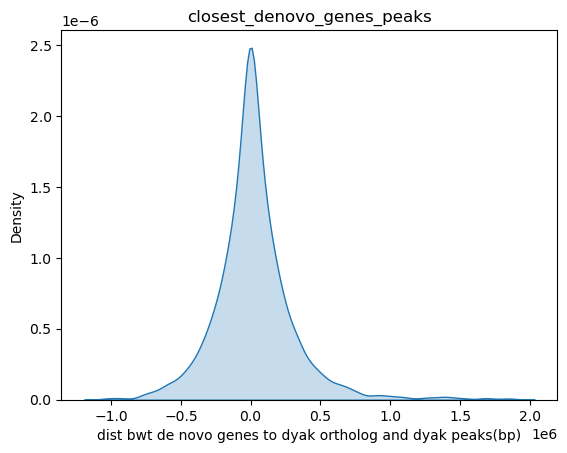

In [193]:
# density plot 
sns.kdeplot(closest_denovo_genes_df['Distance'], shade=True)
plt.title('Density Plot of Distance')
plt.xlabel('dist bwt de novo genes to dyak ortholog and dyak peaks(bp)')
plt.ylabel('Density')
plt.title('closest_denovo_genes_peaks')
plt.savefig('closest_dyak_denovo_genes_peaks.pdf')
plt.show()

In [194]:
# filtering
filtered_denovo = merged_closest_denovo_genes_df[merged_closest_denovo_genes_df["Distance"] <= 1000]
filtered_denovo = filtered_denovo[filtered_denovo["Distance"] >= -1000]
closest_denovo_genes_df.to_csv('/rugpfs/fs0/zhao_lab/scratch/xwu05/detect_peaks_scripts/run_model/cloest_ortholog_denovo_genes_peaks_dyak_within_1kbp.csv', index=False)
filtered_denovo #csv


,Chromosome,Start,End,label_head,label_testis,Nearest_Chromosome,Nearest_Start,Nearest_End,Gene_ID,Distance,Strand
80,2L,324852,325852,1.0,0.0,2L,325522,329761,FBgn0264086,0,-
81,2L,332221,333221,0.0,1.0,2L,329910,332335,FBgn0051921,0,-
274,2L,1198069,1199069,1.0,0.0,2L,1198465,1199266,FBgn0031323,0,-
509,2L,2391087,2392087,0.0,1.0,2L,2391660,2392105,FBgn0287218,0,+
708,2L,3356956,3357956,1.0,1.0,2L,3357646,3358618,FBgn0031526,0,+
...,...,...,...,...,...,...,...,...,...,...,...
24855,X,19888852,19889852,0.0,1.0,X,19886108,19890060,FBgn0086782,0,-
24856,X,19889679,19890679,0.0,1.0,X,19886108,19890060,FBgn0086782,0,-
24881,X,20096950,20097950,0.0,1.0,X,20096162,20096474,FBgn0260871,477,-
24904,X,20260119,20261119,0.0,1.0,X,20259239,20259656,FBgn0260867,-464,+


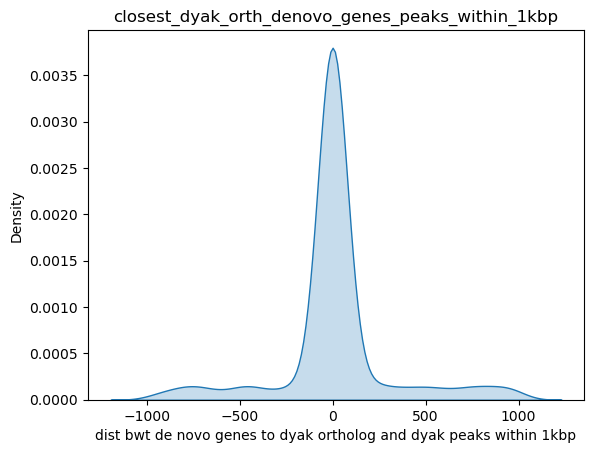

In [195]:
# density plot 
sns.kdeplot(filtered_denovo['Distance'], shade=True)
plt.title('Density Plot of Distance')
plt.xlabel('dist bwt de novo genes to dyak ortholog and dyak peaks within 1kbp')
plt.ylabel('Density')
plt.title('closest_dyak_orth_denovo_genes_peaks_within_1kbp')
plt.savefig('closest_denovo_genes_dyak_orth_peaks_within_1kbp.pdf')
plt.show()